In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objs as go

## 1. Importation sous forme de DataFrame

In [ ]:
url = "https://raw.githubusercontent.com/Projet-Filiere-ADAD/Projet_ADAD/main/Donn%C3%A9es/fr-esr-parcoursup_2018-2024.csv"
df = pd.read_csv(url, sep=';')

/tmp/ipykernel_33046/2000962757.py:2: DtypeWarning: Columns (42,43,45,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, sep=';')


In [ ]:
# Regrouper les filières PASS, PACES et LAS
df['Filière de formation très agrégée'] = df['Filière de formation très agrégée'].replace('PASS', 'PACES/PASS/LAS')
df['Filière de formation très agrégée'] = df['Filière de formation très agrégée'].replace('PACES', 'PACES/PASS/LAS')
df['Filière de formation très agrégée'] = df['Filière de formation très agrégée'].replace('Licence_Las', 'PACES/PASS/LAS')

# Regrouper les écoles de commerce et d'ingénieur
df['Filière de formation très agrégée'] = df['Filière de formation très agrégée'].replace('Ecole de Commerce', 'Grandes écoles')
df['Filière de formation très agrégée'] = df['Filière de formation très agrégée'].replace("Ecole d'Ingénieur", 'Grandes écoles')

# Changement de nom
df['Filière de formation très agrégée'] = df['Filière de formation très agrégée'].replace('DUT', 'BUT')

In [ ]:
df["Néo bacheliers en phase principale"] = df['Effectif des candidats néo bacheliers généraux en phase principale']+df['Effectif des candidats néo bacheliers technologiques en phase principale']+df['Effectif des candidats néo bacheliers professionnels en phase principale']
df["Néo bacheliers boursiers en phase principale"] = df['Dont effectif des candidats boursiers néo bacheliers généraux en phase principale']+df['Dont effectif des candidats boursiers néo bacheliers technologiques en phase principale']+df['Dont effectif des candidats boursiers néo bacheliers professionnels en phase principale']
df["% boursiers en phase principale"] = df["Néo bacheliers boursiers en phase principale"]/df["Néo bacheliers en phase principale"]*100

df["Néo bacheliers classés"] = df['Effectif des candidats néo bacheliers généraux classés par l’établissement']+df['Effectif des candidats néo bacheliers technologiques classés par l’établissement']+df['Effectif des candidats néo bacheliers professionnels classés par l’établissement']
df["Néo bacheliers boursiers classés"] = df['Dont effectif des candidats boursiers néo bacheliers généraux classés par l’établissement']+df['Dont effectif des candidats boursiers néo bacheliers technologiques classés par l’établissement']+df['Dont effectif des candidats boursiers néo bacheliers professionnels classés par l’établissement']
df["% boursiers classés"] = df["Néo bacheliers boursiers classés"]/df["Néo bacheliers classés"]*100

df["Néo bacheliers proposition"] = df['Effectif des candidats en terminale générale ayant reçu une proposition d’admission de la part de l’établissement']+df['Effectif des candidats en terminale technologique ayant reçu une proposition d’admission de la part de l’établissement']+df['Effectif des candidats en terminale professionnelle ayant reçu une proposition d’admission de la part de l’établissement']
df["Néo bacheliers boursiers proposition"] = df['Dont effectif des candidats boursiers en terminale générale ayant reçu une proposition d’admission de la part de l’établissement']+df['Dont effectif des candidats boursiers en terminale technologique ayant reçu une proposition d’admission de la part de l’établissement']+df['Dont effectif des candidats boursiers en terminale générale professionnelle ayant reçu une proposition d’admission de la part de l’établissement']
df["% boursiers proposition"] = df["Néo bacheliers boursiers proposition"]/df["Néo bacheliers proposition"]*100

df["Néo bacheliers admis"] = df["Effectif des admis néo bacheliers"]
df["Néo bacheliers boursiers admis"] = df["Dont effectif des admis boursiers néo bacheliers"]
df["% boursiers admis"] = df["Néo bacheliers boursiers admis"]/df["Néo bacheliers admis"] * 100

df["taux sélection boursiers admis / candidats"] = df["Néo bacheliers boursiers admis"]/df["Néo bacheliers boursiers en phase principale"]*100
df["taux sélection boursiers admis / classés"] = df["Néo bacheliers boursiers admis"]/df["Néo bacheliers boursiers classés"]*100
df["taux sélection boursiers admis / proposition"] = df["Néo bacheliers boursiers admis"]/df["Néo bacheliers boursiers proposition"]*100
df["taux sélection boursiers proposition / candidats"] = df["Néo bacheliers boursiers proposition"]/df["Néo bacheliers boursiers en phase principale"]*100

df["taux sélection admis / candidats"] = df["Néo bacheliers admis"] / df["Néo bacheliers en phase principale"] * 100
df["taux sélection admis / classés"] = df["Néo bacheliers admis"] / df["Néo bacheliers classés"] * 100
df["taux sélection admis / proposition"] = df["Néo bacheliers admis"] / df["Néo bacheliers proposition"] * 100
df["taux sélection proposition / candidats"] = df["Néo bacheliers proposition"] / df["Néo bacheliers en phase principale"] * 100
df["taux sélection classés / candidats"] = df["Néo bacheliers classés"] / df["Néo bacheliers en phase principale"] * 100

df["taux sélection non boursiers admis / candidats"] = (df["Néo bacheliers admis"] - df["Néo bacheliers boursiers admis"]) / (df["Néo bacheliers en phase principale"] - df["Néo bacheliers boursiers en phase principale"]) * 100

# Remplacer les valeurs infinies par des NaN
df = df.replace([np.inf, -np.inf], np.nan)

## 2. Évolution temporelle des taux de boursiers


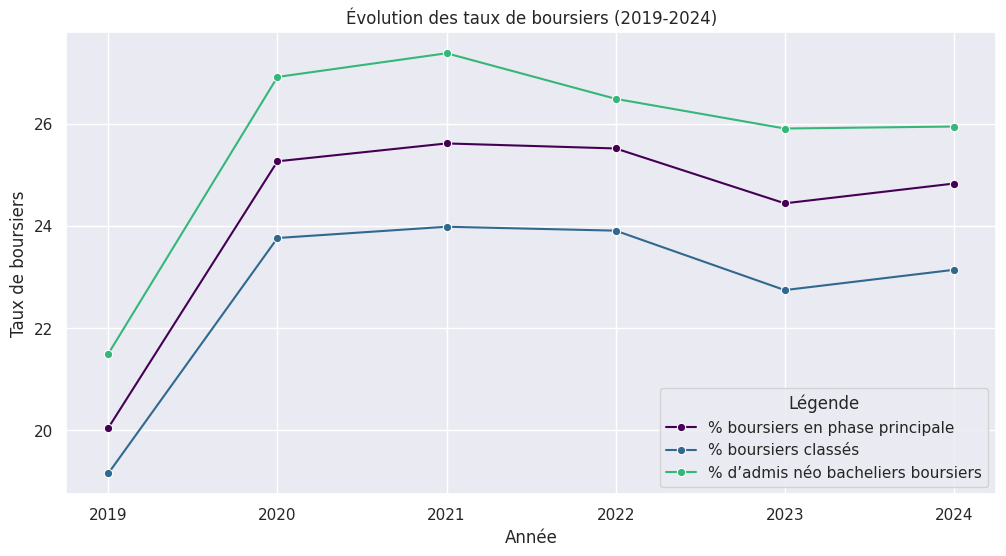

In [ ]:
df_temp = df.groupby('Session')[['% boursiers en phase principale', '% boursiers classés', '% boursiers proposition', '% d’admis néo bacheliers boursiers']].mean().reset_index()
df_temp = df_temp.loc[df_temp['Session'] >= 2019]

# Plot
plt.figure(figsize=(12, 6))

# Define colormap
cmap = plt.get_cmap('viridis')

# Plot each line with a color from the colormap
lines = [
    '% boursiers en phase principale',
    '% boursiers classés',
    # '% boursiers proposition',
    '% d’admis néo bacheliers boursiers'
]

for i, line in enumerate(lines):
    sns.lineplot(
        data=df_temp,
        x='Session',
        y=line,
        marker='o',
        label=line,
        color=cmap(i / len(lines))  # Use colormap to get a gradient color
    )

plt.title("Évolution des taux de boursiers (2019-2024)")
plt.xlabel("Année")
plt.ylabel("Taux de boursiers")
plt.legend(title='Légende')
plt.grid(True)
plt.show()

Analyse : On observe une baisse dans la proportion de boursiers dans la Population des classés par rapport à la Population des candidats mais une hausse dans la Population des admis. Cela semble donc indiquer que les boursiers ont moins de chances d'être classés (puisque le taux diminue) mais semblent mieux classés (lorsqu'ils le sont) car ils ont plus de chances d'être admis. On va essayer d'analyser ce résultat surprenant plus en détail.

Il faut souligner que ce n'est pas le taux d'admission ou de sélection mais bien de le taux de boursiers à chaque étape :
$$\text{\% boursiers étape X} = \frac{\text{Nombre de boursiers étape X}}{\text{Nombre de candidats étape X}}$$

## Proportion d'admis boursiers par rapport aux candidats boursiers par an et filière de formation

In [ ]:
# Création d'une application Dash
app = dash.Dash(__name__)

# Application Layout
app.layout = html.Div([
    # html.H1("Taux d'admission des boursiers par an, par filière de formation, par Région et par statut de l'établissement", style={'text-align': 'center'}),

    # Dropdown pour sélectionner une région
    dcc.Dropdown(
        id='region-selector',
        options=[{'label': region, 'value': region} for region in list(df['Région de l’établissement'].unique())+["France"]],
        value='France',  # Région par défaut
        placeholder="Sélectionnez une région",
        style={'width': '50%', 'margin': 'auto'}
    ),

    # Dropdown pour sélectionner le statut de l'établissement
    dcc.Dropdown(
        id='statut-selector',
        options=[{'label': statut, 'value': statut} for statut in list(df['Statut de l’établissement de la filière de formation (public, privé…)'].unique())+["Tous"]],
        value='Tous',  # Statut par défaut
        placeholder="Sélectionnez un statut",
        style={'width': '50%', 'margin': 'auto', 'margin-top': '10px'}
    ),

    # Dropdown pour sélectionner le statut de l'établissement
    dcc.Dropdown(
        id='filiere-selector',
        options=[{'label': filiere, 'value': filiere} for filiere in list(df["Filière de formation très agrégée"].unique())+["Tous"]],
        value='Tous',  # Statut par défaut
        placeholder="Sélectionnez une filière",
        style={'width': '50%', 'margin': 'auto', 'margin-top': '10px'}
    ),

    # Graphique interactif
    dcc.Graph(id='boursiers-graph')
])

# Callback pour mettre à jour le graphique en fonction de la région et du statut sélectionnés
@app.callback(
    Output('boursiers-graph', 'figure'),
    [Input('region-selector', 'value'), Input('statut-selector', 'value'), Input('filiere-selector', 'value')]
)
def update_graph(selected_region, selected_statut, selected_filiere):
    # Filtrer les données par région
    if selected_region == 'France':
        filtered_df = df
    else:
        filtered_df = df[df['Région de l’établissement'] == selected_region]

    # Filtrer les données par statut
    if selected_statut != 'Tous':
        filtered_df = filtered_df[filtered_df['Statut de l’établissement de la filière de formation (public, privé…)'] == selected_statut]

    # Filtrer les données par filière
    if selected_filiere != 'Tous':
        filtered_df = filtered_df[filtered_df['Filière de formation très agrégée'] == selected_filiere]

    # Calcul de la proportion moyenne par filière
    filtered_df = (
        filtered_df.groupby(['Session'])[['taux sélection boursiers admis / candidats', 'taux sélection non boursiers admis / candidats']]
        .mean()
        .sort_values(by='Session', ascending=False)
    ).reset_index()

    # Transform the DataFrame
    filtered_df = filtered_df.melt(
        id_vars=['Session'],
        value_vars=['taux sélection boursiers admis / candidats', 'taux sélection non boursiers admis / candidats'],
        var_name='Population',
        value_name='taux sélection'
    )

    # Rename the values in the 'Population' column
    filtered_df['Population'] = filtered_df['Population'].replace({
        'taux sélection boursiers admis / candidats': 'Boursiers',
        'taux sélection non boursiers admis / candidats': 'Non boursiers'
    })

    if selected_filiere == 'Tous':
        msg_filiere = "toutes les filières"
    else:
        msg_filiere = f"la filière {selected_filiere}"

    if selected_region == 'Tous':
        msg_region = "toutes les régions"
    else:
        msg_region = f"la région {selected_region}"

    if selected_statut == 'Tous':
        msg_statut = "tous les statuts"
    else:
        msg_statut = f"le statut {selected_statut}"

    # Créer un graphique interactif avec Plotly
    fig = px.line(
        filtered_df,
        x='Session',
        y='taux sélection',
        color='Population',
        title=f"Taux d'admission par an pour {msg_filiere} dans {msg_region} pour {msg_statut}",
        # labels={'taux sélection boursiers admis / candidats': 'Taux d\'admission des boursiers'},
        markers=True,
        color_discrete_map={  # Assign specific colors
            'Boursiers': '#636EFA',
            'Non boursiers': '#316395'
        }
    )

    fig.update_layout(
        xaxis_title="Session",
        yaxis_title="Taux d'admission",
        showlegend=True  # Ensure the legend is displayed
    )
    return fig

# Lancer l'application
if __name__ == '__main__':
    app.run_server(debug=False, use_reloader=False)


Analyse: Comme on pouvait s'y attendre, le taux d'admission des boursiers est supérieur au taux d'admission de la population générale dans les licences, en BTS et en DUT. Il est très proche en licence santé, en CPGE et en IFSI. Seules les grandes écoles présentent un taux supérieur pour la population générale mais seulement sur la période 2020-2022. Au global, les élèves boursiers semblent présenter un taux d'admission supérieur, présent sur toutes les années.

On montre donc que les boursiers avaient globalement plus de chances d'être admis que les non-boursiers dans certaines filières. 

$$\text{taux d'admission} = \frac{\text{nombre d'admis}}{\text{nombre de candidats}}$$

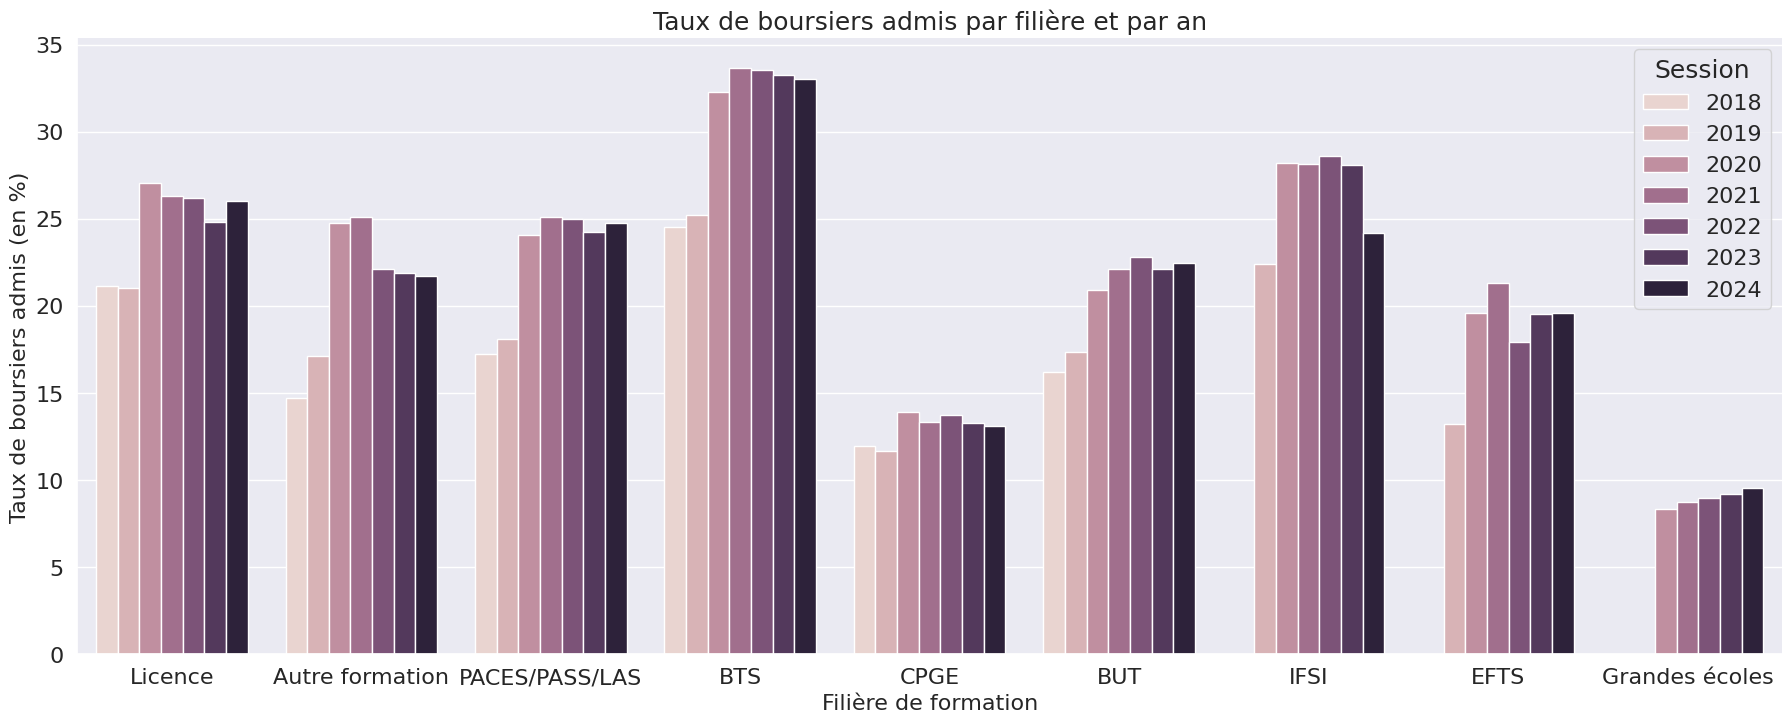

In [ ]:
plt.figure(figsize=(22, 8))

ax2 = sns.barplot(
    data=df,
    x='Filière de formation très agrégée',
    y="% boursiers admis",
    #estimator=mean,
    errorbar=None,
    #palette='rocket',
    hue='Session',
    #dodge=True
)
plt.title("Taux de boursiers admis par filière et par an", fontsize=18)
plt.xlabel("Filière de formation", fontsize=16)
plt.ylabel("Taux de boursiers admis (en %)", fontsize=16)
# plt.xticks(rotation=45, ha='right')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Session', loc='upper right', title_fontsize=18, fontsize=16)
sns.despine()

Analyse: On compare les taux de boursiers (et pas les taux de sélection) entre les filières entre elles et leurs évolutions temporelles. On voit que la réforme mise en place en 2020 (notamment les quotas) a fait augmenter les taux de boursiers dans toutes les filières. Aussi, et comme on pouvait s'y attendre, on retrouve un taux de boursiers faibles en CPGE et dans les grandes écoles et un taux plus important en BTS.

# 4. Affichage de tes chances d'admission

In [ ]:
# Create a Dash application
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.H1("Affichage de tes chances d'admission", style={'text-align': 'center', 'color': '#333'}),

    html.Div([
        html.Label('Établissement:', style={'font-weight': 'bold'}),
        dcc.Dropdown(
            id='school-selector',
            options=[{'label': school, 'value': school} for school in list(df['Établissement'].unique()) + ["Tous"]],
            value='Tous',
            placeholder="Sélectionnez un établissement",
            style={'width': '100%', 'margin-bottom': '10px'}
        )
    ], style={'width': '50%', 'margin': 'auto', 'margin-top': '20px'}),

    html.Div([
        html.Label('Filière:', style={'font-weight': 'bold'}),
        dcc.Dropdown(
            id='filiere-selector',
            options=[{'label': filiere, 'value': filiere} for filiere in list(df['Filière de formation très agrégée'].unique()) + ["Tous"]],
            value='Tous',
            placeholder="Sélectionnez une filière",
            style={'width': '100%', 'margin-bottom': '10px'}
        )
    ], style={'width': '50%', 'margin': 'auto'}),

    html.Div([
        html.Label('Filière détaillée:', style={'font-weight': 'bold'}),
        dcc.Dropdown(
            id='detailed-filiere-selector',
            options=[{'label': detailed, 'value': detailed} for detailed in list(df['Filière de formation détaillée'].unique()) + ["Tous"]],
            value='Tous',
            placeholder="Sélectionnez une filière détaillée",
            style={'width': '100%', 'margin-bottom': '10px'}
        )
    ], style={'width': '50%', 'margin': 'auto'}),

    html.Div([
        html.Label('Statut boursier:', style={'font-weight': 'bold'}),
        dcc.Dropdown(
            id='boursier-selector',
            options=[
                {'label': 'Oui', 'value': 'Oui'},
                {'label': 'Non', 'value': 'Non'},
                {'label': 'Tous', 'value': 'Tous'}
            ],
            value='Tous',
            placeholder="Sélectionnez un statut boursier",
            style={'width': '100%', 'margin-bottom': '10px'}
        )
    ], style={'width': '50%', 'margin': 'auto'}),

    # Display the result
    dcc.Graph(id='result-graph', style={'margin-top': '20px'})
], style={'font-family': 'Arial, sans-serif', 'padding': '20px'})

# Callback to update the result based on selections
@app.callback(
    Output('result-graph', 'figure'),
    [Input('school-selector', 'value'),
     Input('filiere-selector', 'value'),
     Input('detailed-filiere-selector', 'value'),
     Input('boursier-selector', 'value'),
    ]
)
def update_result(selected_school, selected_filiere, selected_detailed_filiere, selected_boursier):
    # Filter the DataFrame based on selections
    filtered_df = df
    if selected_school != 'Tous':
        filtered_df = filtered_df.loc[filtered_df['Établissement'] == selected_school]
    if selected_filiere != 'Tous':
        filtered_df = filtered_df.loc[filtered_df['Filière de formation très agrégée'] == selected_filiere]
    if selected_detailed_filiere != 'Tous':
        filtered_df = filtered_df.loc[filtered_df['Filière de formation détaillée'] == selected_detailed_filiere]

    # Select the appropriate column based on "boursier" selection
    if selected_boursier == 'Oui':
        taux_column = 'taux sélection boursiers admis / candidats'
    elif selected_boursier == 'Non':
        taux_column = 'taux sélection non boursiers admis / candidats'
    else:
        taux_column = 'taux sélection admis / candidats'

    # Calculate the average taux for the filtered data
    average_taux = filtered_df[taux_column].mean()

    # Create a gauge chart
    figure = go.Figure(go.Indicator(
        mode="gauge+number",
        value=average_taux,
        title={'text': "Taux de sélection moyen"},
        gauge={
            'axis': {'range': [0, 100]},
            'bar': {'color': "#1f77b4"},
            'steps': [
                {'range': [0, 30], 'color': "#d62728"},
                {'range': [30, 70], 'color': "#ff7f0e"},
                {'range': [70, 100], 'color': "#2ca02c"}
            ],
        }
    ))

    return figure

# Run the application
if __name__ == '__main__':
    app.run_server(debug=False, use_reloader=False, port=8050)

# 5. Violin plot du taux de sélection boursiers et non-boursiers en fonction des filières

In [ ]:
# Calcul de la proportion moyenne par filière
df_temp = df.loc[df['Session'] == 2024, ['Filière de formation très agrégée', 'taux sélection boursiers admis / candidats', 'taux sélection non boursiers admis / candidats']]

# Transform the DataFrame
df_temp = df_temp.melt(
    id_vars=['Filière de formation très agrégée'],
    value_vars=['taux sélection boursiers admis / candidats', "taux sélection non boursiers admis / candidats"],
    var_name='Population',
    value_name='taux sélection'
)

# Rename the values in the 'population' column
df_temp['Population'] = df_temp['Population'].replace({
    'taux sélection boursiers admis / candidats': 'Boursiers',
    'taux sélection non boursiers admis / candidats': 'Non boursiers'
})

df_temp = df_temp.loc[df_temp["taux sélection"]<100]

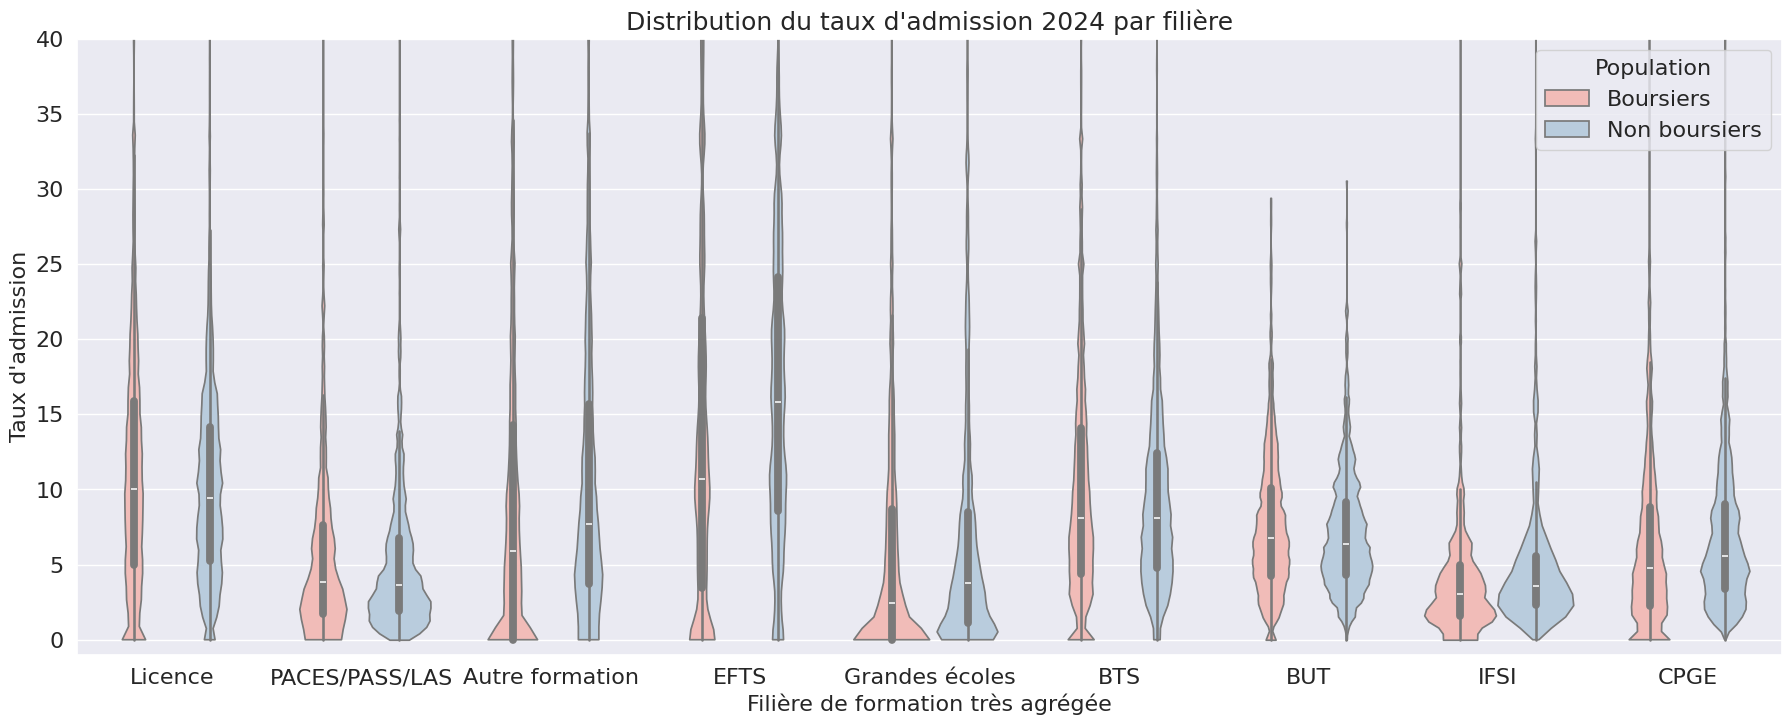

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(22, 8))

plt.ylim(-1, 40)

# Grouped violinplot
sns.violinplot(x="Filière de formation très agrégée", y="taux sélection", hue="Population", data=df_temp, palette="Pastel1", cut=0, bw_adjust=.25)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Filière de formation très agrégée', fontsize=16)
plt.ylabel("Taux d'admission", fontsize=16)
plt.title("Distribution du taux d'admission 2024 par filière", fontsize=18)
plt.legend(title='Population', loc='upper right', title_fontsize=16, fontsize=16)
plt.show()

Analyse : On observe ici la distribution du taux de sélection des différentes formations 2024 par filière. Globalement, les populations boursiers et non-boursiers présentent des distributions similaires mais quelques points sont à souligner:
- Plus de filières santé présentent un taux de sélection nul pour les boursiers mais les taux de sélection des non boursiers non nuls tendent à être inférieurs menant à une moyenne similaire
- Les Grandes Ecoles tendent à avoir un plus grand nombre de taux de sélection nuls pour les boursiers, menant à une moyenne plus faible que pour les non boursiers. On retrouve ce phénomène pour les IFSI et les CPGE. 

On remarque également les différences de distribution d'une filière à l'autre avec les grandes écoles, les IFSI et les filières santé très sélectives et de grandes disparités selon les établissements pour les licences, les EFTS, les BTS, les BUT et les CPGE.

# 6. Bubble plot (x=nb candidats, y= nb admis, taille=nb boursiers admis, couleur= filiere)

In [ ]:
df["% boursiers admis"] = df["% boursiers admis"].fillna(0)

In [ ]:
df_temp = df.loc[(df["Département de l’établissement"] == "Bouches-du-Rhône") & (df["Session"] == 2024)]

In [ ]:
# Create interactive bubble plot
df_temp = df.loc[(df["Département de l’établissement"] == "Bouches-du-Rhône") & (df["Session"] == 2024)]
df_temp["hover_name"] = df_temp["Établissement"] + " - " + df_temp["Filière de formation très agrégée"]

fig = px.scatter(
    df_temp,
    x="taux sélection boursiers admis / candidats",
    y="taux sélection non boursiers admis / candidats",
    size="Néo bacheliers admis",
    color="Filière de formation très agrégée",
    hover_name="hover_name",
    size_max=60,
    title="Formations des Bouches-du-Rhône en 2024",
)

# Add dashed line y=x
fig.add_shape(
    type="line",
    x0=0,
    y0=0,
    x1=max(df_temp["taux sélection non boursiers admis / candidats"]),
    y1=max(df_temp["taux sélection non boursiers admis / candidats"]),
    line=dict(color="gray", dash="dash")
)

# Update layout to increase font size
fig.update_layout(
    xaxis_range=[0, 20],  # Set x-axis limits
    yaxis_range=[0, 20],   # Set y-axis limits
    title={
        'font': {'size': 24}  # Increase title font size
    },
    xaxis_title="Taux d'admission boursiers",
    yaxis_title="Taux d'admission non boursiers",
    xaxis=dict(
        title_font=dict(size=20),  # Increase x-axis title font size
        tickfont=dict(size=20)    # Increase x-axis tick font size
    ),
    yaxis=dict(
        title_font=dict(size=20),  # Increase y-axis title font size
        tickfont=dict(size=20)    # Increase y-axis tick font size
    ),
    legend=dict(
        x=0.5,  # Center the legend horizontally
        y=-0.12,  # Position the legend below the chart
        xanchor='center',
        yanchor='top',
        orientation='h',  # Horizontal orientation
        font=dict(size=20)  # Increase legend font size
    ),
    width=1800,  # Increase plot width
    height=700   # Increase plot height
)

# Show plot
fig.show()

/tmp/ipykernel_33046/935403847.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Analyse : la plupart des points sont en dessous de la droite y=x, ce qui est cohérent avec nos graphes précédents indiquant que les taux de sélection pour les boursiers ont tendance à être supérieurs à ceux des non boursiers. L'idée de ce graphe est de comparer les taux de sélection selon la taille de la formation (ie le nombre d'admis) : on observe que les formations les plus importantes ont tendance à avoir un taux de sélection plus faible, que ce soit pour les boursiers ou les non boursiers mais ce phénomène est plus marqué chez les boursiers. Pour les CPGE, on note néanmoins un effet inverse. 